In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing,decomposition
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt


In [42]:
data = pd.read_csv('X_data_2_1_0.csv')
#data = pd.get_dummies(data)
data = data.drop(['0','1'], axis=1)
X = data
pca = decomposition.PCA(n_components=3, svd_solver='full')
X = pd.DataFrame(pca.fit_transform(X))
labels = pd.read_csv('y_data_2_1_0.csv')
y = labels['team1_pts']+labels['team2_pts']
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.4,shuffle=False)
#X_valid, X_test, y_valid, y_test = train_test_split( X_valid, y_valid, test_size=0.5,shuffle=False)
WIDTH = len(X.columns.values)

In [38]:
X_train

,0,1,2,3,4,5,6,7
0,12.973026,4.878367,3.612687,7.880173,-7.294780,1.947177,9.279911,9.861933
1,-6.876881,-2.863583,3.237393,3.379485,-1.148625,-3.356455,1.020700,4.435729
2,0.621927,-6.107610,-7.970815,-5.453582,3.583373,-0.107498,-10.288761,7.790696
3,-1.391702,-2.863843,-6.048311,-2.181736,4.584073,19.071328,0.241616,2.699268
4,-16.592411,-10.578372,-13.515137,-2.456607,3.327907,-14.894253,-8.394698,8.667564
...,...,...,...,...,...,...,...,...
595,-0.533795,4.698716,3.311369,14.160290,3.612155,-22.669897,6.783941,-0.882158
596,28.363859,-31.234392,19.285200,-3.621036,-3.791909,6.120602,12.053539,-18.344679
597,9.182293,11.128491,-10.599807,-10.717374,2.961551,18.404850,-15.612123,6.135583
598,21.637476,3.792170,-0.588904,12.195388,2.142587,6.045448,14.688041,-6.027119


0.07854749023583896
0.046371104333292834


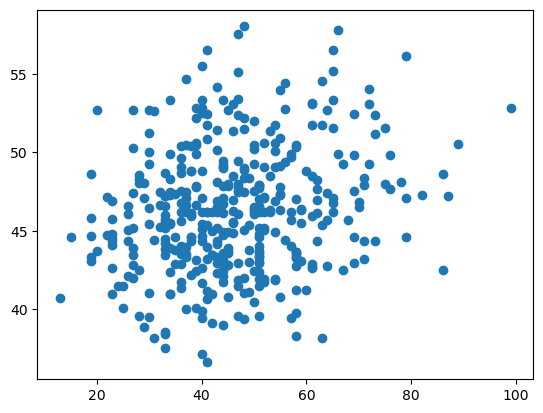

In [45]:
reg = Ridge().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_valid, y_valid))
y_pred = reg.predict(X_valid)

plt.scatter(y_valid, y_pred)

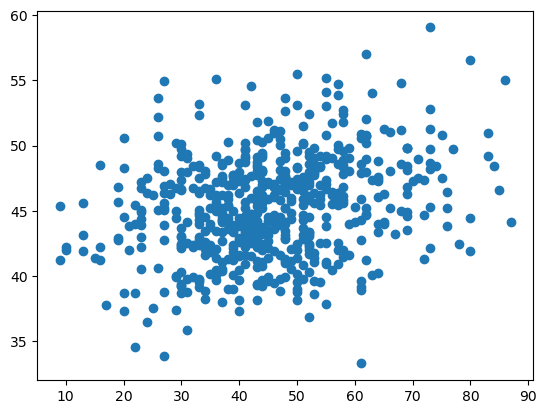

In [46]:
y_pred = reg.predict(X_train)

plt.scatter(y_train, y_pred)

0.09833333333333333
0.029925187032418952


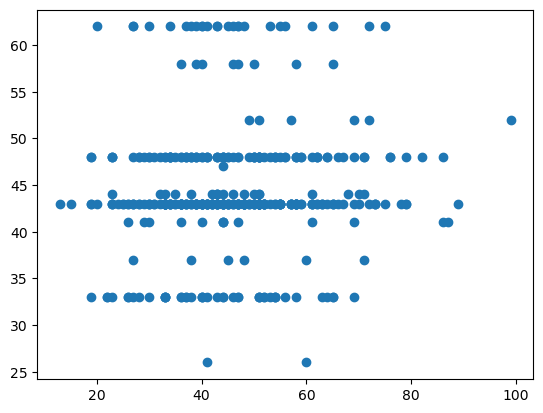

In [47]:
reg = RandomForestClassifier(n_estimators=100,min_samples_leaf=30,max_depth=3,bootstrap=True, oob_score=True).fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_valid, y_valid))
y_pred = reg.predict(X_valid)

plt.scatter(y_valid, y_pred)

In [48]:
from sklearn import tree
reg = tree.DecisionTreeClassifier(min_samples_split=20,min_samples_leaf=4,max_depth=50,max_features=6).fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_valid, y_valid))
#y_pred = reg.predict(X_test)
#plt.scatter(y_test, y_pred)

0.23666666666666666
0.032418952618453865


0.022443890274314215


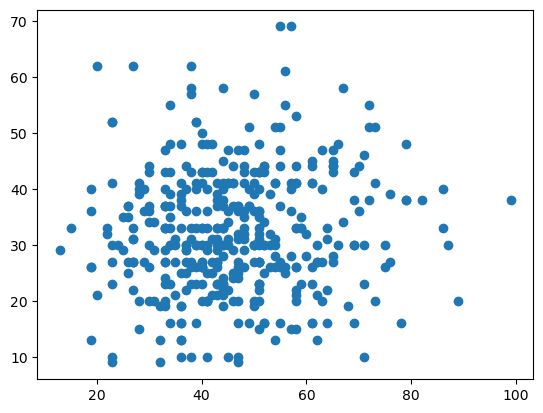

In [53]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print(clf.score(X_valid, y_valid))
y_pred = clf.predict(X_valid)
plt.scatter(y_valid, y_pred)